Group Members: Priti Kamat, Sri Vidya Yeluripati, Siddhant Bhadsavale

    Q1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to generate moon-shaped data
def create_moon_data(n_samples=1000, noise=0.1):
    X, _ = make_moons(n_samples=n_samples, noise=noise)
    return torch.tensor(X, dtype=torch.float32)


In [3]:
# Core Autoencoder Class
class Autoencoder(nn.Module):
    def __init__(self, input_size, bottleneck_size, hidden_size, layers):
        super(Autoencoder, self).__init__()
        # Encoder
        encoder_layers = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        for _ in range(layers - 1):
            encoder_layers.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
        encoder_layers.append(nn.Linear(hidden_size, bottleneck_size))
        self.encoder = nn.Sequential(*encoder_layers)

        # Decoder
        decoder_layers = [nn.Linear(bottleneck_size, hidden_size), nn.ReLU()]
        for _ in range(layers - 1):
            decoder_layers.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
        decoder_layers.append(nn.Linear(hidden_size, input_size))
        self.decoder = nn.Sequential(*decoder_layers)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [4]:
# Function to train the autoencoder
def train_autoencoder(model, data_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()

    start_time = time.time()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for inputs, _ in data_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(data_loader):.4f}")
    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds")
    return model


In [5]:
# Small-scale training example
train_data = create_moon_data(n_samples=1000)  # Dataset with 1000 points
data_loader = DataLoader(TensorDataset(train_data, train_data), batch_size=32, shuffle=True)  # DataLoader

# Autoencoder Configuration
autoencoder = Autoencoder(
    input_size=2,         # Input dimension
    bottleneck_size=1,     # Code dimension
    hidden_size=8,          # Hidden layer dimension
    layers=2             # Number of hidden layers
)

# Train Autoencoder
trained_autoencoder = train_autoencoder(autoencoder, data_loader, num_epochs=10, learning_rate=0.001)


Epoch [1/10], Loss: 0.7554
Epoch [2/10], Loss: 0.6599
Epoch [3/10], Loss: 0.6008
Epoch [4/10], Loss: 0.5300
Epoch [5/10], Loss: 0.4289
Epoch [6/10], Loss: 0.2909
Epoch [7/10], Loss: 0.1740
Epoch [8/10], Loss: 0.1280
Epoch [9/10], Loss: 0.1188
Epoch [10/10], Loss: 0.1092
Training completed in 0.85 seconds


Q1.1

Investigating hidden_size...
Epoch [1/10], Loss: 0.5117
Epoch [2/10], Loss: 0.5059
Epoch [3/10], Loss: 0.4954
Epoch [4/10], Loss: 0.4859
Epoch [5/10], Loss: 0.4577
Epoch [6/10], Loss: 0.4313
Epoch [7/10], Loss: 0.3994
Epoch [8/10], Loss: 0.3616
Epoch [9/10], Loss: 0.3219
Epoch [10/10], Loss: 0.2930
Training completed in 1.45 seconds


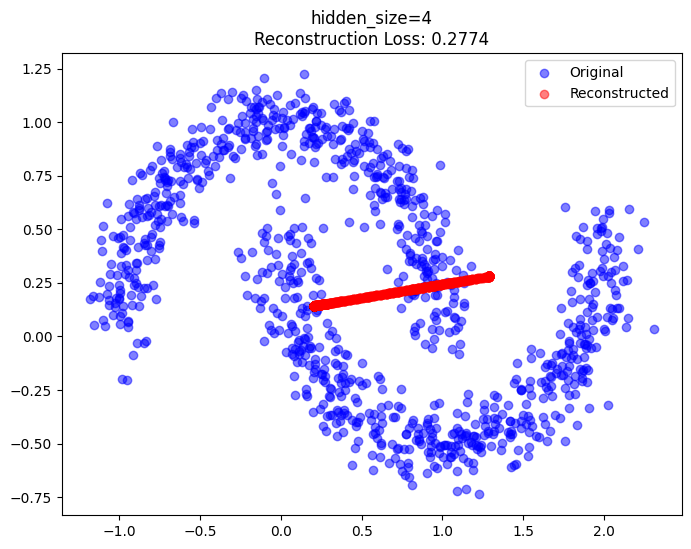

Epoch [1/10], Loss: 0.5714
Epoch [2/10], Loss: 0.5292
Epoch [3/10], Loss: 0.5143
Epoch [4/10], Loss: 0.4987
Epoch [5/10], Loss: 0.4996
Epoch [6/10], Loss: 0.4565
Epoch [7/10], Loss: 0.3529
Epoch [8/10], Loss: 0.2326
Epoch [9/10], Loss: 0.1411
Epoch [10/10], Loss: 0.1150
Training completed in 1.31 seconds


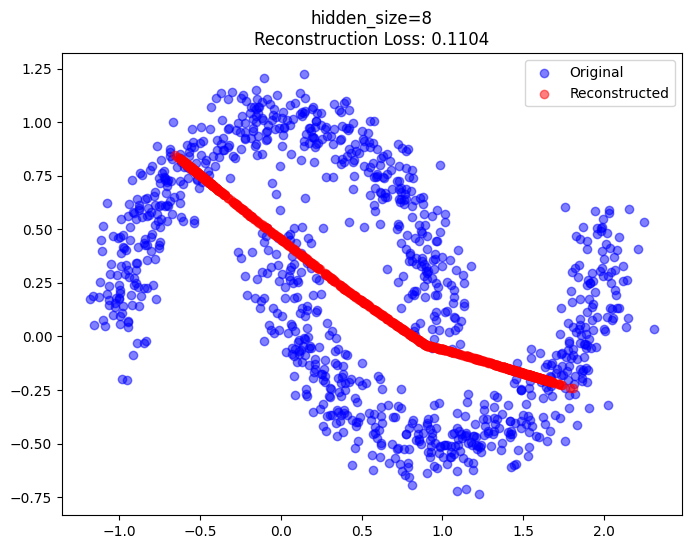

Epoch [1/10], Loss: 0.6026
Epoch [2/10], Loss: 0.4613
Epoch [3/10], Loss: 0.2820
Epoch [4/10], Loss: 0.1460
Epoch [5/10], Loss: 0.1087
Epoch [6/10], Loss: 0.0970
Epoch [7/10], Loss: 0.0917
Epoch [8/10], Loss: 0.0884
Epoch [9/10], Loss: 0.0852
Epoch [10/10], Loss: 0.0827
Training completed in 1.42 seconds


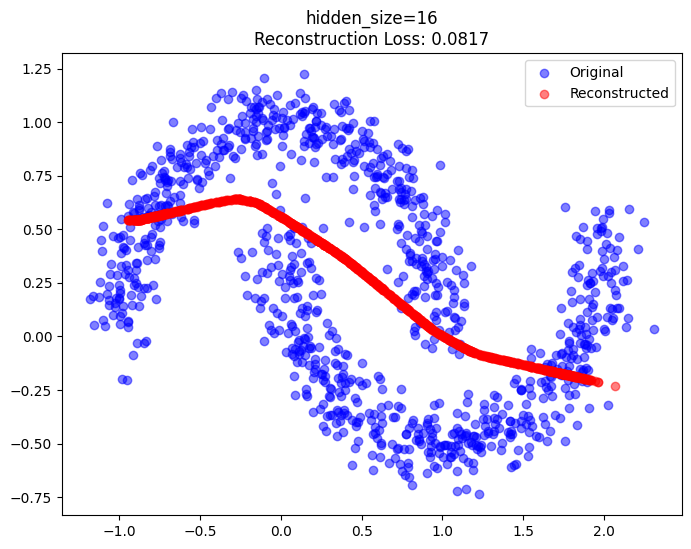

Epoch [1/10], Loss: 0.5553
Epoch [2/10], Loss: 0.2449
Epoch [3/10], Loss: 0.1043
Epoch [4/10], Loss: 0.0839
Epoch [5/10], Loss: 0.0766
Epoch [6/10], Loss: 0.0701
Epoch [7/10], Loss: 0.0646
Epoch [8/10], Loss: 0.0608
Epoch [9/10], Loss: 0.0566
Epoch [10/10], Loss: 0.0531
Training completed in 1.42 seconds


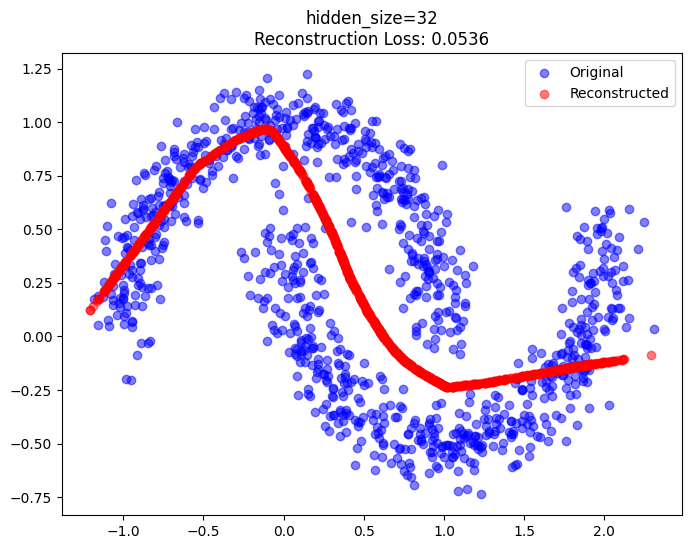

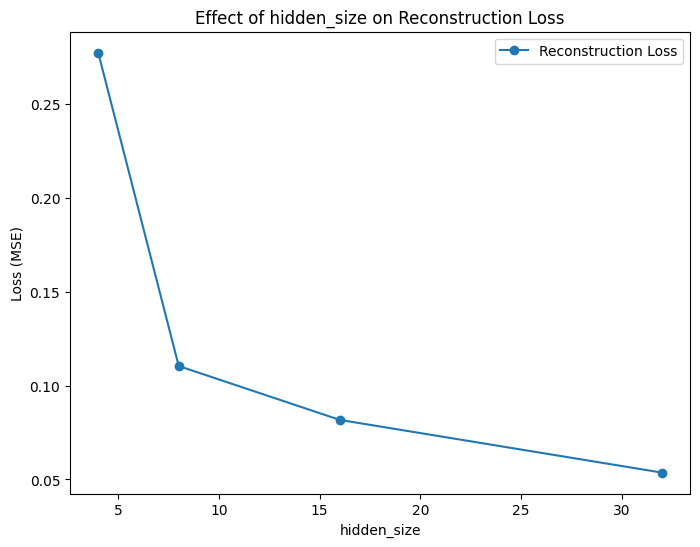

Investigating layers...
Epoch [1/10], Loss: 0.8422
Epoch [2/10], Loss: 0.6463
Epoch [3/10], Loss: 0.4679
Epoch [4/10], Loss: 0.3311
Epoch [5/10], Loss: 0.2359
Epoch [6/10], Loss: 0.1694
Epoch [7/10], Loss: 0.1256
Epoch [8/10], Loss: 0.1043
Epoch [9/10], Loss: 0.0972
Epoch [10/10], Loss: 0.0951
Training completed in 1.04 seconds


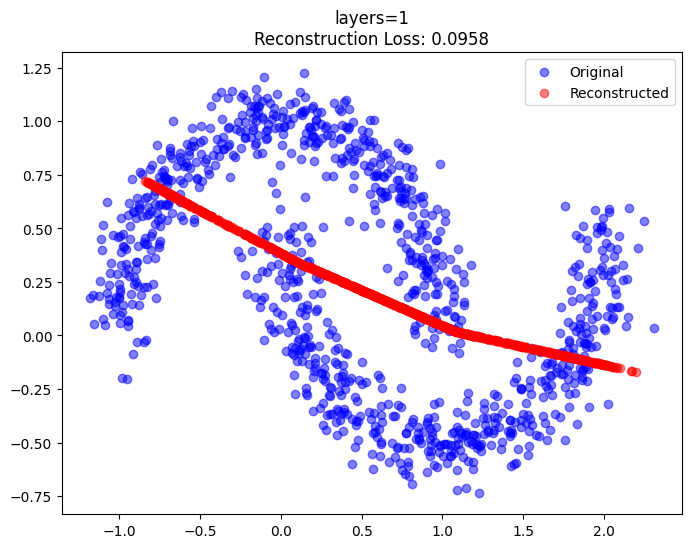

Epoch [1/10], Loss: 0.7705
Epoch [2/10], Loss: 0.6382
Epoch [3/10], Loss: 0.4781
Epoch [4/10], Loss: 0.3369
Epoch [5/10], Loss: 0.2537
Epoch [6/10], Loss: 0.2012
Epoch [7/10], Loss: 0.1687
Epoch [8/10], Loss: 0.1472
Epoch [9/10], Loss: 0.1351
Epoch [10/10], Loss: 0.1224
Training completed in 1.44 seconds


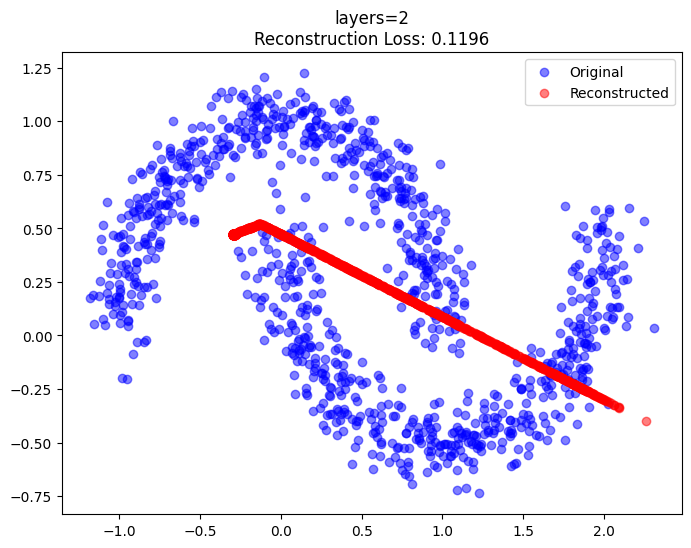

Epoch [1/10], Loss: 0.8093
Epoch [2/10], Loss: 0.6751
Epoch [3/10], Loss: 0.5722
Epoch [4/10], Loss: 0.5168
Epoch [5/10], Loss: 0.5058
Epoch [6/10], Loss: 0.4784
Epoch [7/10], Loss: 0.3968
Epoch [8/10], Loss: 0.2648
Epoch [9/10], Loss: 0.2008
Epoch [10/10], Loss: 0.1751
Training completed in 1.74 seconds


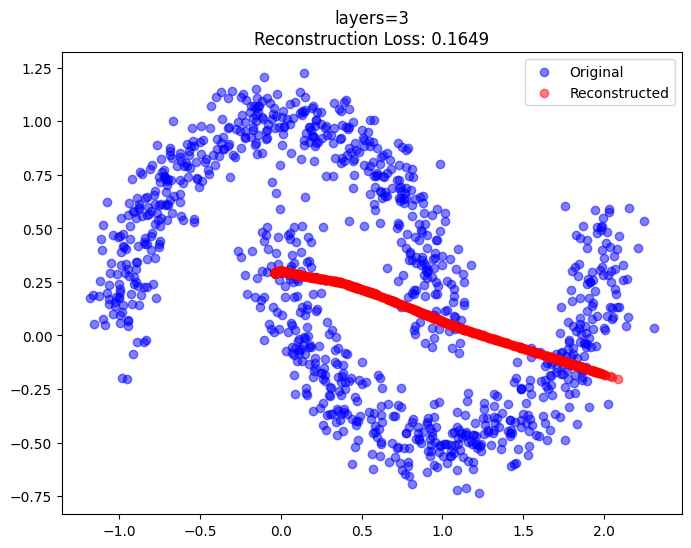

Epoch [1/10], Loss: 0.5444
Epoch [2/10], Loss: 0.5256
Epoch [3/10], Loss: 0.5133
Epoch [4/10], Loss: 0.5016
Epoch [5/10], Loss: 0.4650
Epoch [6/10], Loss: 0.3595
Epoch [7/10], Loss: 0.2575
Epoch [8/10], Loss: 0.2216
Epoch [9/10], Loss: 0.1958
Epoch [10/10], Loss: 0.1798
Training completed in 2.05 seconds


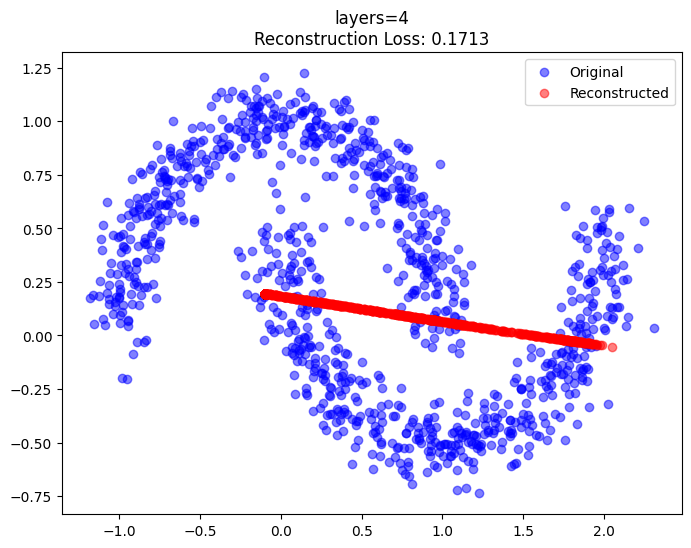

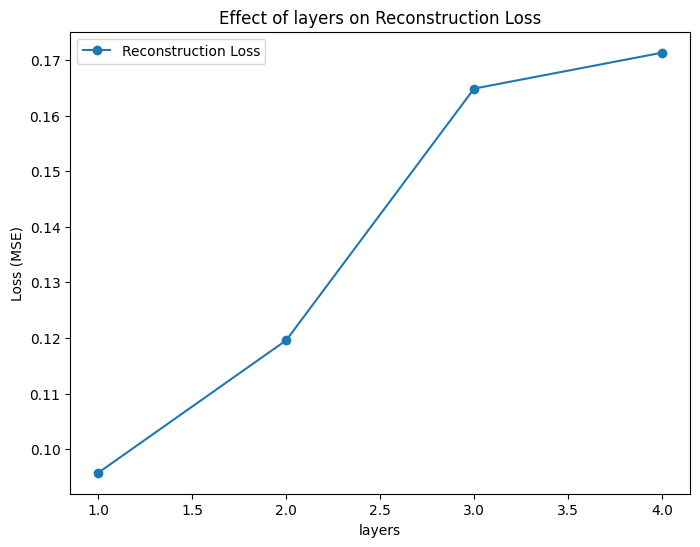

Investigating batch_size...
Epoch [1/10], Loss: 0.6249
Epoch [2/10], Loss: 0.4021
Epoch [3/10], Loss: 0.1382
Epoch [4/10], Loss: 0.0988
Epoch [5/10], Loss: 0.0922
Epoch [6/10], Loss: 0.0884
Epoch [7/10], Loss: 0.0848
Epoch [8/10], Loss: 0.0832
Epoch [9/10], Loss: 0.0818
Epoch [10/10], Loss: 0.0804
Training completed in 2.65 seconds


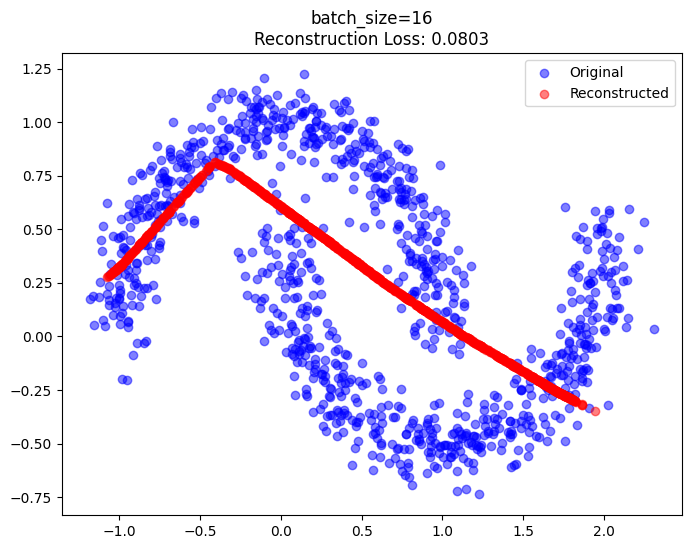

Epoch [1/10], Loss: 0.5144
Epoch [2/10], Loss: 0.5119
Epoch [3/10], Loss: 0.5082
Epoch [4/10], Loss: 0.4750
Epoch [5/10], Loss: 0.3987
Epoch [6/10], Loss: 0.3025
Epoch [7/10], Loss: 0.2486
Epoch [8/10], Loss: 0.2227
Epoch [9/10], Loss: 0.2055
Epoch [10/10], Loss: 0.1961
Training completed in 1.48 seconds


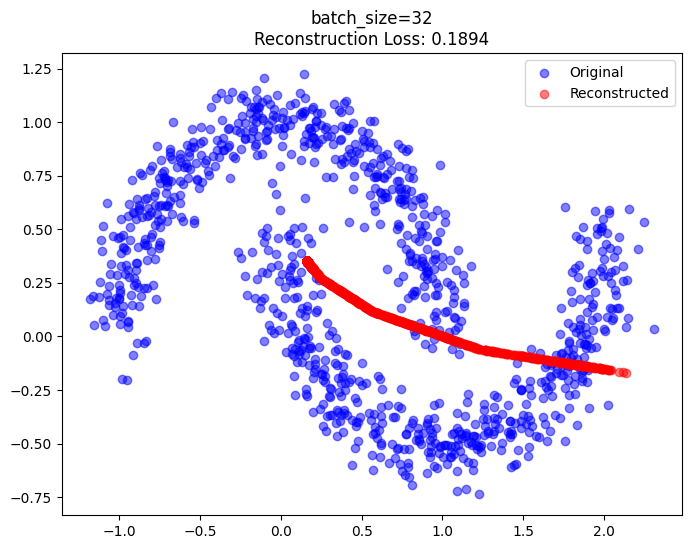

Epoch [1/10], Loss: 0.6514
Epoch [2/10], Loss: 0.5843
Epoch [3/10], Loss: 0.5335
Epoch [4/10], Loss: 0.4876
Epoch [5/10], Loss: 0.4391
Epoch [6/10], Loss: 0.3819
Epoch [7/10], Loss: 0.3120
Epoch [8/10], Loss: 0.2366
Epoch [9/10], Loss: 0.1758
Epoch [10/10], Loss: 0.1334
Training completed in 0.77 seconds


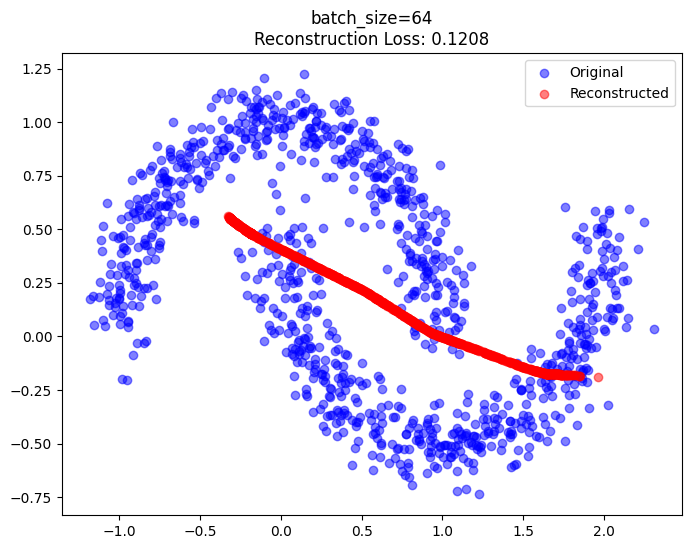

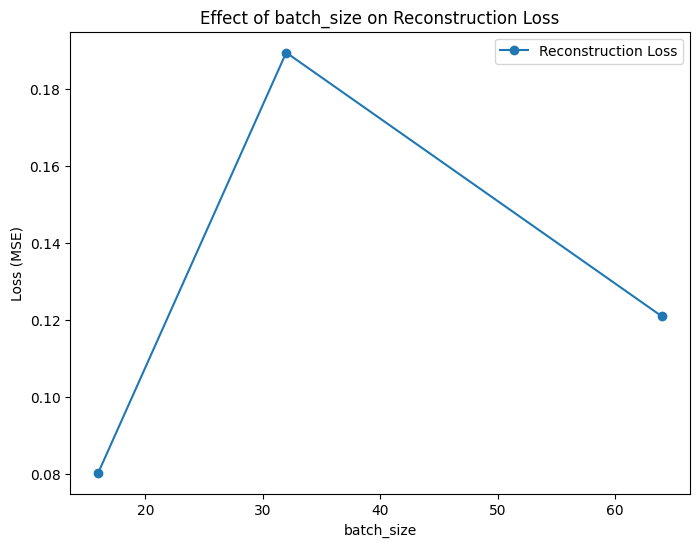

Investigating learning_rate...
Epoch [1/10], Loss: 0.4040
Epoch [2/10], Loss: 0.1297
Epoch [3/10], Loss: 0.0895
Epoch [4/10], Loss: 0.0821
Epoch [5/10], Loss: 0.0764
Epoch [6/10], Loss: 0.0705
Epoch [7/10], Loss: 0.0605
Epoch [8/10], Loss: 0.0537
Epoch [9/10], Loss: 0.0471
Epoch [10/10], Loss: 0.0507
Training completed in 1.37 seconds


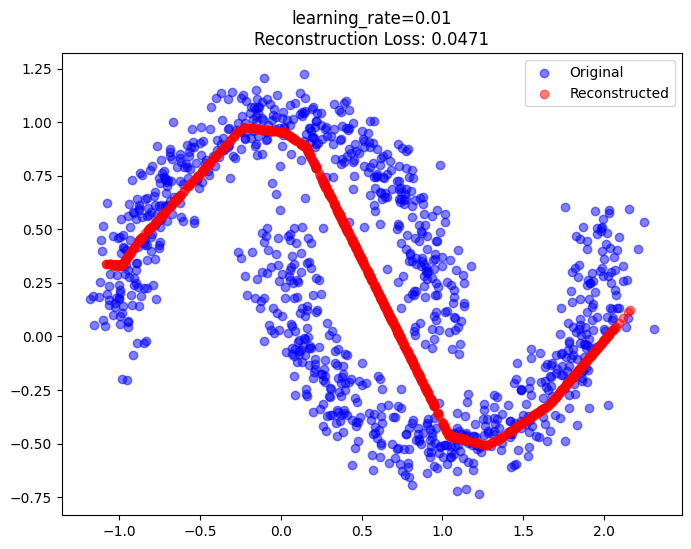

Epoch [1/10], Loss: 0.9966
Epoch [2/10], Loss: 0.8451
Epoch [3/10], Loss: 0.7283
Epoch [4/10], Loss: 0.6485
Epoch [5/10], Loss: 0.5790
Epoch [6/10], Loss: 0.5387
Epoch [7/10], Loss: 0.4969
Epoch [8/10], Loss: 0.4097
Epoch [9/10], Loss: 0.2651
Epoch [10/10], Loss: 0.1920
Training completed in 1.81 seconds


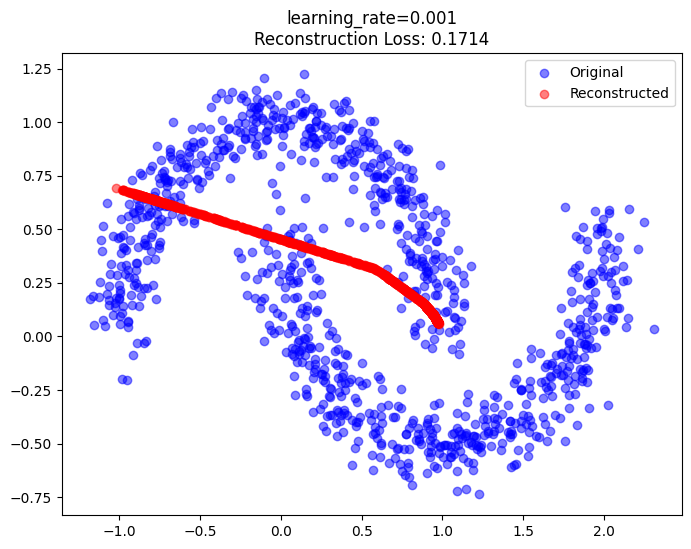

Epoch [1/10], Loss: 0.6180
Epoch [2/10], Loss: 0.6086
Epoch [3/10], Loss: 0.6070
Epoch [4/10], Loss: 0.5955
Epoch [5/10], Loss: 0.5930
Epoch [6/10], Loss: 0.5926
Epoch [7/10], Loss: 0.5951
Epoch [8/10], Loss: 0.5870
Epoch [9/10], Loss: 0.5903
Epoch [10/10], Loss: 0.5795
Training completed in 2.47 seconds


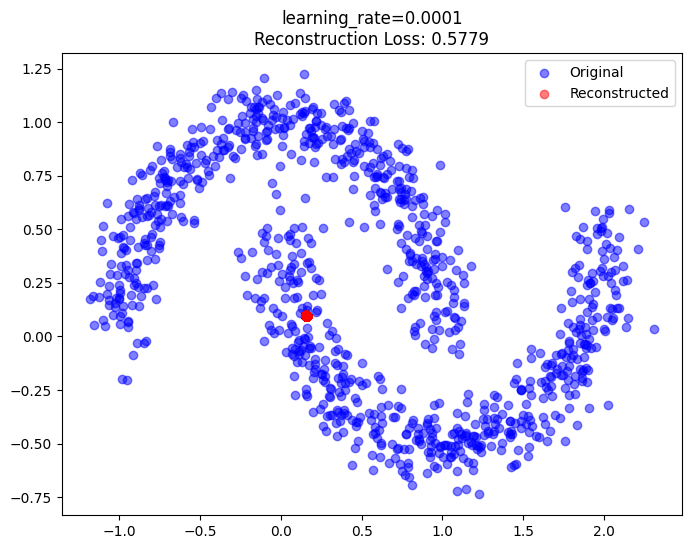

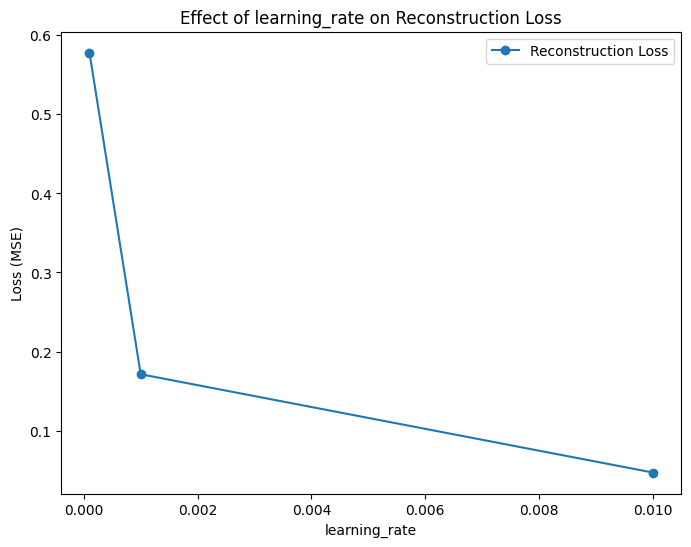

Investigating num_epochs...
Epoch [1/5], Loss: 0.5850
Epoch [2/5], Loss: 0.5374
Epoch [3/5], Loss: 0.4796
Epoch [4/5], Loss: 0.3939
Epoch [5/5], Loss: 0.2816
Training completed in 1.23 seconds


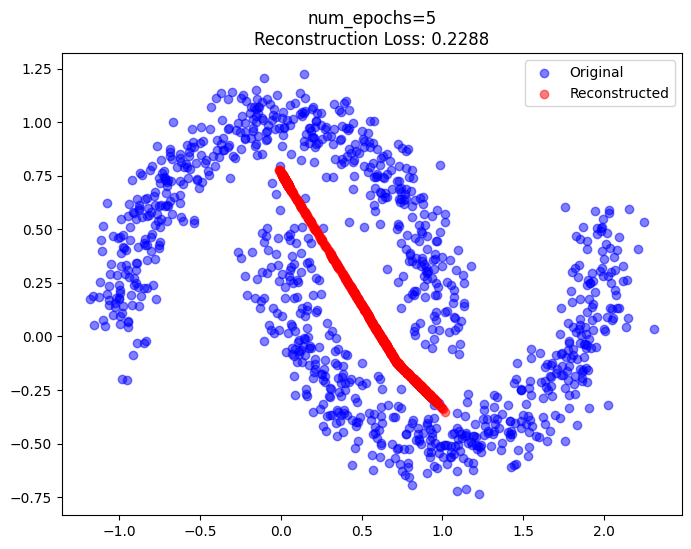

Epoch [1/10], Loss: 0.8234
Epoch [2/10], Loss: 0.7444
Epoch [3/10], Loss: 0.6696
Epoch [4/10], Loss: 0.5827
Epoch [5/10], Loss: 0.4950
Epoch [6/10], Loss: 0.4217
Epoch [7/10], Loss: 0.3706
Epoch [8/10], Loss: 0.3344
Epoch [9/10], Loss: 0.2976
Epoch [10/10], Loss: 0.2697
Training completed in 2.70 seconds


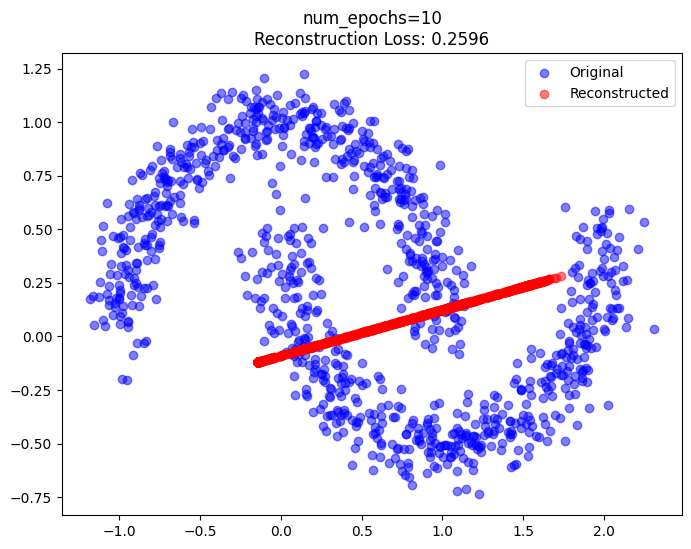

Epoch [1/20], Loss: 0.6480
Epoch [2/20], Loss: 0.5810
Epoch [3/20], Loss: 0.5258
Epoch [4/20], Loss: 0.4829
Epoch [5/20], Loss: 0.4167
Epoch [6/20], Loss: 0.2978
Epoch [7/20], Loss: 0.1984
Epoch [8/20], Loss: 0.1752
Epoch [9/20], Loss: 0.1649
Epoch [10/20], Loss: 0.1578
Epoch [11/20], Loss: 0.1524
Epoch [12/20], Loss: 0.1463
Epoch [13/20], Loss: 0.1425
Epoch [14/20], Loss: 0.1373
Epoch [15/20], Loss: 0.1343
Epoch [16/20], Loss: 0.1293
Epoch [17/20], Loss: 0.1269
Epoch [18/20], Loss: 0.1233
Epoch [19/20], Loss: 0.1214
Epoch [20/20], Loss: 0.1185
Training completed in 4.30 seconds


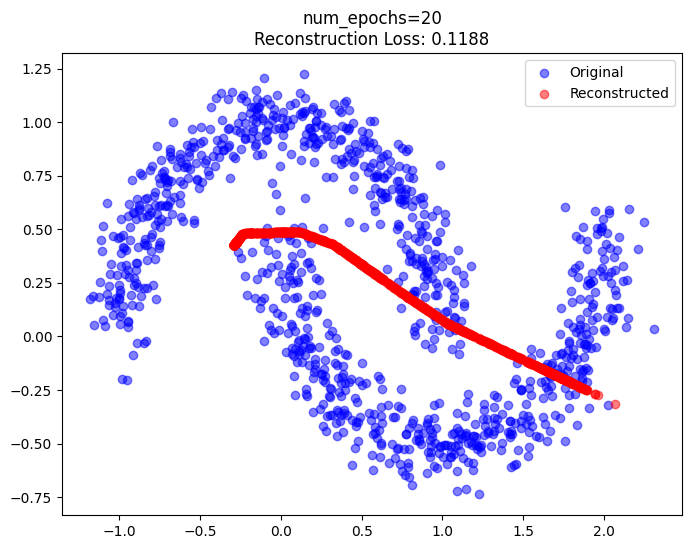

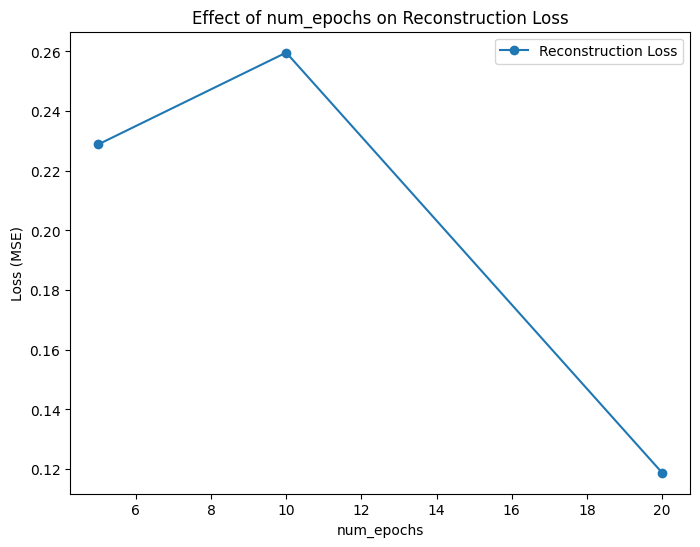

{'hidden_size': [0.2774193286895752,
  0.11039876192808151,
  0.08170574903488159,
  0.053631238639354706],
 'layers': [0.09575194120407104,
  0.11957427859306335,
  0.16485640406608582,
  0.17131109535694122],
 'batch_size': [0.08027946949005127, 0.18935155868530273, 0.12083621323108673],
 'learning_rate': [0.047071654349565506,
  0.1713695377111435,
  0.5779375433921814],
 'num_epochs': [0.22882139682769775, 0.2595931589603424, 0.11876710504293442]}

In [ ]:
def investigate_hyperparameters(autoencoder_class, hyperparams, values_dict, fixed_params, n_samples=1000):
    results = {}
    test_data = create_moon_data(n_samples=n_samples)

    for hyperparam, values in values_dict.items():
        print(f"Investigating {hyperparam}...")
        losses = []
        for value in values:
            params = fixed_params.copy()
            params[hyperparam] = value
            train_data = create_moon_data(n_samples=n_samples)
            data_loader = DataLoader(TensorDataset(train_data, train_data), batch_size=params['batch_size'], shuffle=True)

            model = autoencoder_class(
                input_size=params['input_size'],
                bottleneck_size=params['bottleneck_size'],
                hidden_size=params['hidden_size'],
                layers=params['layers']
            )
            model = train_autoencoder(model, data_loader, params['num_epochs'], params['learning_rate'])
            loss = evaluate_model(model, test_data, title=f"{hyperparam}={value}")
            losses.append(loss)

        results[hyperparam] = losses

        plt.figure(figsize=(8, 6))
        plt.plot(values, losses, marker='o', label="Reconstruction Loss")
        plt.title(f"Effect of {hyperparam} on Reconstruction Loss")
        plt.xlabel(hyperparam)
        plt.ylabel("Loss (MSE)")
        plt.legend()
        plt.show()

    return results

fixed_params = {
    'input_size': 2,
    'bottleneck_size': 1,
    'hidden_size': 8,
    'layers': 2,
    'num_epochs': 10,
    'batch_size': 32,
    'learning_rate': 0.001
}

hyperparams_to_test = {
    'hidden_size': [4, 8, 16, 32],
    'layers': [1, 2, 3, 4],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.01, 0.001, 0.0001],
    'num_epochs': [5, 10, 20]
}

investigate_hyperparameters(
    autoencoder_class=Autoencoder,
    hyperparams=fixed_params,
    values_dict=hyperparams_to_test,
    fixed_params=fixed_params,
    n_samples=1000
)


As the hidden_size increases, the reconstruction loss decreases significantly. Smaller hidden_size values show higher reconstruction errors, suggesting a limited ability to capture the complexity of the data.
Increasing the number of layers results in higher reconstruction loss. The loss increases consistently as the model complexity grows.Adding more layers might lead to overfitting or optimization challenges.
 The reconstruction loss is lowest at both small and large batch sizes, while intermediate batch sizes show significantly higher losses.
Lower learning rates result in significantly higher reconstruction loss. As the learning rate increases, the loss decreases sharply and stabilizes. Higher learning rates are more effective in minimizing reconstruction loss,likely due to faster convergence.
 Increasing the number of epochs initially raises the reconstruction loss, but beyond a certain point, the loss decreases substantially, indicating improved learning.

Q.1.2

Epoch [1/20], Loss: 0.5983
Epoch [2/20], Loss: 0.5262
Epoch [3/20], Loss: 0.4986
Epoch [4/20], Loss: 0.4008
Epoch [5/20], Loss: 0.1911
Epoch [6/20], Loss: 0.1169
Epoch [7/20], Loss: 0.0944
Epoch [8/20], Loss: 0.0869
Epoch [9/20], Loss: 0.0838
Epoch [10/20], Loss: 0.0771
Epoch [11/20], Loss: 0.0724
Epoch [12/20], Loss: 0.0682
Epoch [13/20], Loss: 0.0622
Epoch [14/20], Loss: 0.0584
Epoch [15/20], Loss: 0.0552
Epoch [16/20], Loss: 0.0530
Epoch [17/20], Loss: 0.0495
Epoch [18/20], Loss: 0.0478
Epoch [19/20], Loss: 0.0462
Epoch [20/20], Loss: 0.0455
Training completed in 3.46 seconds
Epoch [1/20], Loss: 0.0452
Epoch [2/20], Loss: 0.0444
Epoch [3/20], Loss: 0.0436
Epoch [4/20], Loss: 0.0429
Epoch [5/20], Loss: 0.0427
Epoch [6/20], Loss: 0.0419
Epoch [7/20], Loss: 0.0417
Epoch [8/20], Loss: 0.0413
Epoch [9/20], Loss: 0.0403
Epoch [10/20], Loss: 0.0403
Epoch [11/20], Loss: 0.0407
Epoch [12/20], Loss: 0.0394
Epoch [13/20], Loss: 0.0390
Epoch [14/20], Loss: 0.0390
Epoch [15/20], Loss: 0.0375
Epo

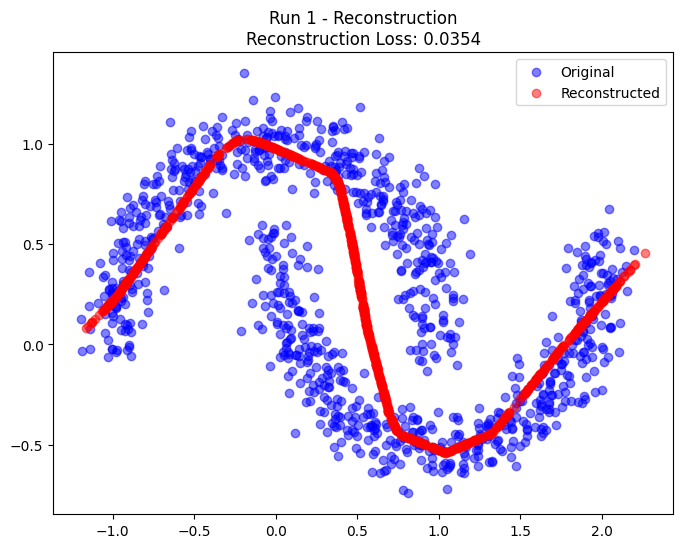

Epoch [1/20], Loss: 0.0367
Epoch [2/20], Loss: 0.0366
Epoch [3/20], Loss: 0.0357
Epoch [4/20], Loss: 0.0357
Epoch [5/20], Loss: 0.0364
Epoch [6/20], Loss: 0.0347
Epoch [7/20], Loss: 0.0339
Epoch [8/20], Loss: 0.0344
Epoch [9/20], Loss: 0.0346
Epoch [10/20], Loss: 0.0340
Epoch [11/20], Loss: 0.0339
Epoch [12/20], Loss: 0.0340
Epoch [13/20], Loss: 0.0343
Epoch [14/20], Loss: 0.0323
Epoch [15/20], Loss: 0.0319
Epoch [16/20], Loss: 0.0325
Epoch [17/20], Loss: 0.0315
Epoch [18/20], Loss: 0.0318
Epoch [19/20], Loss: 0.0330
Epoch [20/20], Loss: 0.0330
Training completed in 3.61 seconds


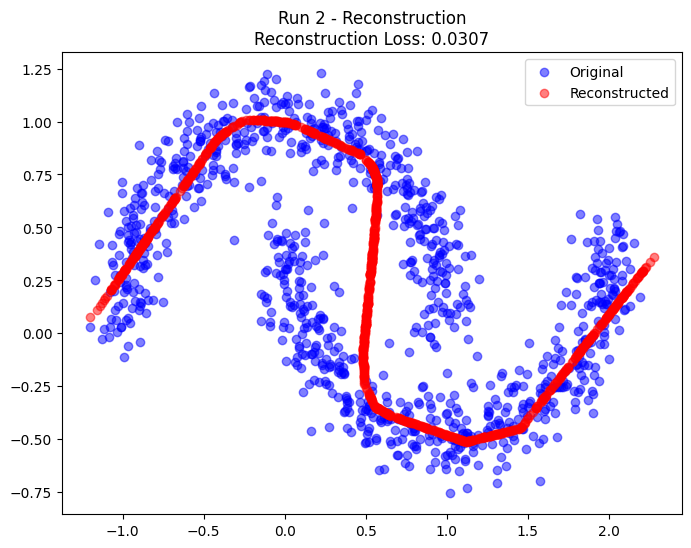

Epoch [1/20], Loss: 0.0310
Epoch [2/20], Loss: 0.0309
Epoch [3/20], Loss: 0.0296
Epoch [4/20], Loss: 0.0302
Epoch [5/20], Loss: 0.0295
Epoch [6/20], Loss: 0.0293
Epoch [7/20], Loss: 0.0295
Epoch [8/20], Loss: 0.0286
Epoch [9/20], Loss: 0.0285
Epoch [10/20], Loss: 0.0277
Epoch [11/20], Loss: 0.0284
Epoch [12/20], Loss: 0.0274
Epoch [13/20], Loss: 0.0273
Epoch [14/20], Loss: 0.0275
Epoch [15/20], Loss: 0.0257
Epoch [16/20], Loss: 0.0260
Epoch [17/20], Loss: 0.0256
Epoch [18/20], Loss: 0.0260
Epoch [19/20], Loss: 0.0250
Epoch [20/20], Loss: 0.0245
Training completed in 3.47 seconds


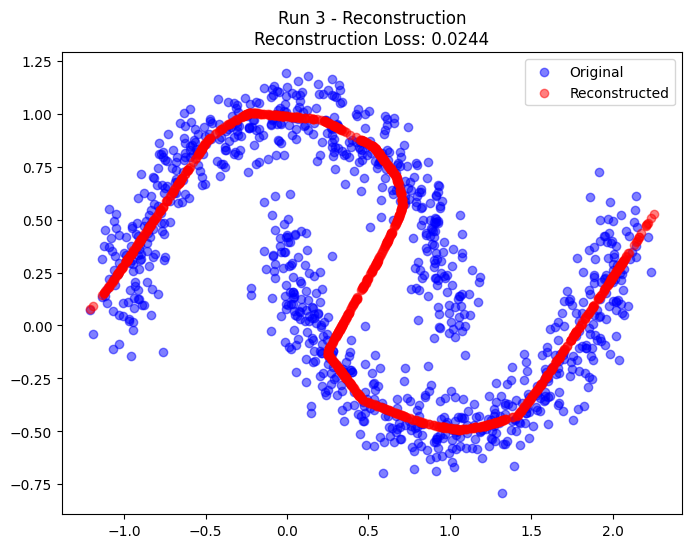

In [ ]:
train_data = create_moon_data(n_samples=1000)
data_loader = DataLoader(TensorDataset(train_data, train_data), batch_size=fixed_params['batch_size'], shuffle=True)
autoencoder = Autoencoder(
    input_size=fixed_params['input_size'],
    bottleneck_size=fixed_params['bottleneck_size'],
    hidden_size=16,
    layers=3
)
autoencoder = train_autoencoder(autoencoder, data_loader, num_epochs=20, learning_rate=0.001)


for i in range(3):
    train_data = create_moon_data(n_samples=1000)
    data_loader = DataLoader(TensorDataset(train_data, train_data), batch_size=fixed_params['batch_size'], shuffle=True)
    autoencoder = train_autoencoder(autoencoder, data_loader, num_epochs=20, learning_rate=0.001)
    evaluate_model(autoencoder, train_data, title=f"Run {i+1} - Reconstruction")


From the graphs provided, it’s evident that reconstruction quality and loss values show slight variation across multiple training runs, even with the same hyperparameter settings. In Run 1, the reconstructed curve is close to the original data but has noticeable deviations, and the reconstruction loss is higher. By the third run, the model achieves a much lower reconstruction loss, and the reconstructed curve aligns more closely with the original data points. This variation can be attributed to factors such as differences in random initialization or variations in data used for training. Overall, the model demonstrates consistent improvement across runs, showing that it effectively captures the underlying data patterns, though slight inconsistencies may arise from training dynamics.

Q.1.3

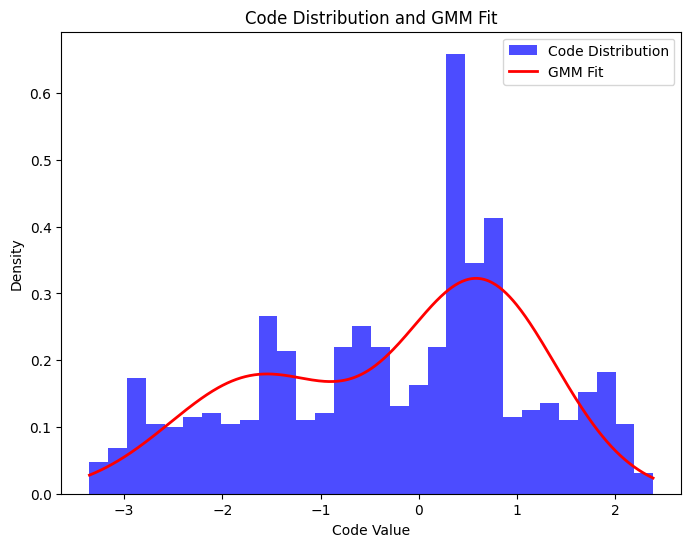

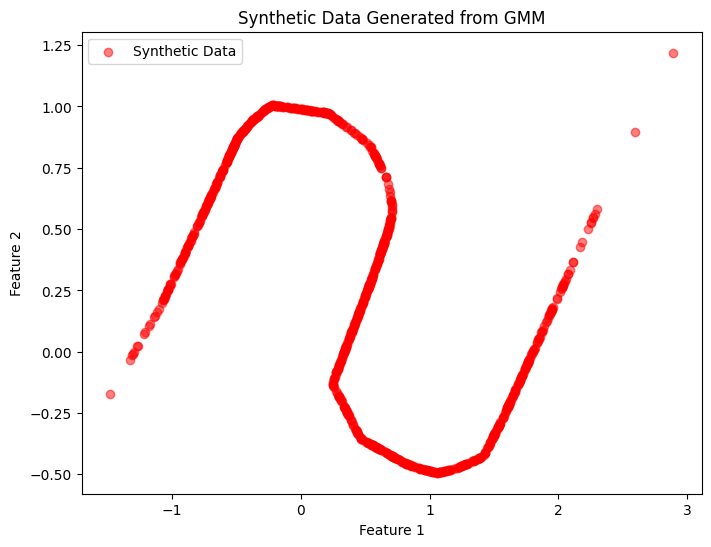

array([[ 0.7027443 , -0.42352736],
       [ 0.37392795,  0.05190684],
       [ 1.5035294 , -0.33617318],
       ...,
       [-0.49458584,  0.86844796],
       [-0.85635495,  0.4534341 ],
       [-0.64863193,  0.69172955]], dtype=float32)

In [ ]:
def analyze_and_generate_synthetic(autoencoder, train_data, n_samples=1000):
    with torch.no_grad():
        codes = autoencoder.encoder(train_data).numpy()

    gmm = GaussianMixture(n_components=2, random_state=42).fit(codes)
    x = np.linspace(codes.min(), codes.max(), 500).reshape(-1, 1)
    gmm_pdf = np.exp(gmm.score_samples(x))

    plt.figure(figsize=(8, 6))
    plt.hist(codes, bins=30, alpha=0.7, color="blue", density=True, label="Code Distribution")
    plt.plot(x, gmm_pdf, label="GMM Fit", color="red", linewidth=2)
    plt.title("Code Distribution and GMM Fit")
    plt.xlabel("Code Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    sampled_codes, _ = gmm.sample(n_samples=n_samples)
    synthetic_data = autoencoder.decoder(torch.tensor(sampled_codes, dtype=torch.float32)).detach().numpy()

    plt.figure(figsize=(8, 6))
    plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], label="Synthetic Data", alpha=0.5, color="red")
    plt.title("Synthetic Data Generated from GMM")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

    return synthetic_data

analyze_and_generate_synthetic(autoencoder, train_data)


The generated data seems to be of high quality based on the graphs provided. In the first graph, the GMM fit (red line) aligns well with the code distribution (blue histogram), which shows that the GMM has captured the data distribution effectively. This indicates that the GMM accurately modeled the key patterns in the original data. In the second graph, the synthetic data generated from the GMM matches the expected structure of the dataset, forming a clear curve that closely resembles the original relationships between features. This consistency between the GMM fit and the generated data shows that the model is capable of producing reliable and realistic data samples.

Q.1.4

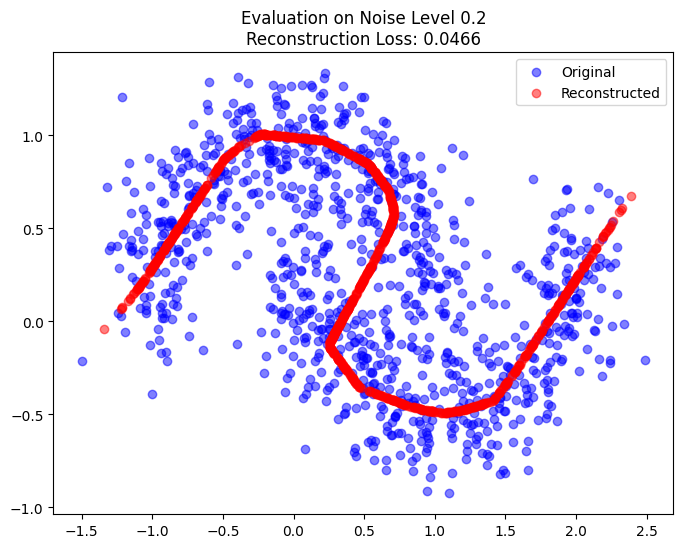

0.04656088724732399

In [ ]:
# Evaluate autoencoder trained on noise level 0.1 with test set noise level 0.2
test_data_0_2 = create_moon_data(n_samples=1000, noise=0.2)
evaluate_model(autoencoder, test_data_0_2, title="Evaluation on Noise Level 0.2")

Q.1.5

Epoch [1/20], Loss: 0.5559
Epoch [2/20], Loss: 0.4637
Epoch [3/20], Loss: 0.2855
Epoch [4/20], Loss: 0.2070
Epoch [5/20], Loss: 0.1546
Epoch [6/20], Loss: 0.1198
Epoch [7/20], Loss: 0.1042
Epoch [8/20], Loss: 0.0983
Epoch [9/20], Loss: 0.0932
Epoch [10/20], Loss: 0.0891
Epoch [11/20], Loss: 0.0862
Epoch [12/20], Loss: 0.0821
Epoch [13/20], Loss: 0.0793
Epoch [14/20], Loss: 0.0738
Epoch [15/20], Loss: 0.0726
Epoch [16/20], Loss: 0.0701
Epoch [17/20], Loss: 0.0679
Epoch [18/20], Loss: 0.0655
Epoch [19/20], Loss: 0.0644
Epoch [20/20], Loss: 0.0646
Training completed in 3.46 seconds


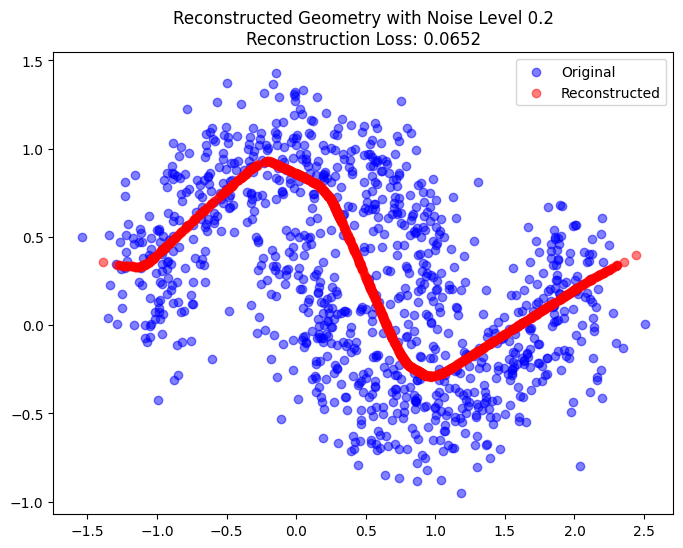

0.06515903025865555

In [ ]:
# Train autoencoder on noise level 0.2
train_data_0_2 = create_moon_data(n_samples=1000, noise=0.2)
data_loader_0_2 = DataLoader(TensorDataset(train_data_0_2, train_data_0_2), batch_size=fixed_params['batch_size'], shuffle=True)
autoencoder_0_2 = Autoencoder(
    input_size=fixed_params['input_size'],
    bottleneck_size=fixed_params['bottleneck_size'],
    hidden_size=16,
    layers=3
)
autoencoder_0_2 = train_autoencoder(autoencoder_0_2, data_loader_0_2, num_epochs=20, learning_rate=0.001)

evaluate_model(autoencoder_0_2, train_data_0_2, title="Reconstructed Geometry with Noise Level 0.2")


The reconstructed geometry in the image shows that the model does a good job of capturing the overall shape of the original data, even with a noise level of 0.2. The red line generally follows the trend of the blue points, but there are some areas where the reconstruction deviates slightly, especially in regions where the original points are more scattered due to noise. This suggests that while the model is robust to a certain level of noise, its accuracy is slightly affected, as reflected in the reconstruction loss of 0.0652. Overall, the key structure of the data is preserved, but finer details may be impacted by the added noise.

Q.2

Epoch [1/20], Recon Loss: 0.6288, MMD Loss: 0.5454
Epoch [2/20], Recon Loss: 0.5428, MMD Loss: 0.3798
Epoch [3/20], Recon Loss: 0.4700, MMD Loss: 0.2181
Epoch [4/20], Recon Loss: 0.3382, MMD Loss: 0.1287
Epoch [5/20], Recon Loss: 0.1360, MMD Loss: 0.0873
Epoch [6/20], Recon Loss: 0.0570, MMD Loss: 0.0740
Epoch [7/20], Recon Loss: 0.0289, MMD Loss: 0.0640
Epoch [8/20], Recon Loss: 0.0158, MMD Loss: 0.0613
Epoch [9/20], Recon Loss: 0.0076, MMD Loss: 0.0578
Epoch [10/20], Recon Loss: 0.0050, MMD Loss: 0.0629
Epoch [11/20], Recon Loss: 0.0040, MMD Loss: 0.0582
Epoch [12/20], Recon Loss: 0.0039, MMD Loss: 0.0583
Epoch [13/20], Recon Loss: 0.0032, MMD Loss: 0.0566
Epoch [14/20], Recon Loss: 0.0022, MMD Loss: 0.0566
Epoch [15/20], Recon Loss: 0.0021, MMD Loss: 0.0605
Epoch [16/20], Recon Loss: 0.0024, MMD Loss: 0.0568
Epoch [17/20], Recon Loss: 0.0023, MMD Loss: 0.0594
Epoch [18/20], Recon Loss: 0.0025, MMD Loss: 0.0586
Epoch [19/20], Recon Loss: 0.0016, MMD Loss: 0.0557
Epoch [20/20], Recon 

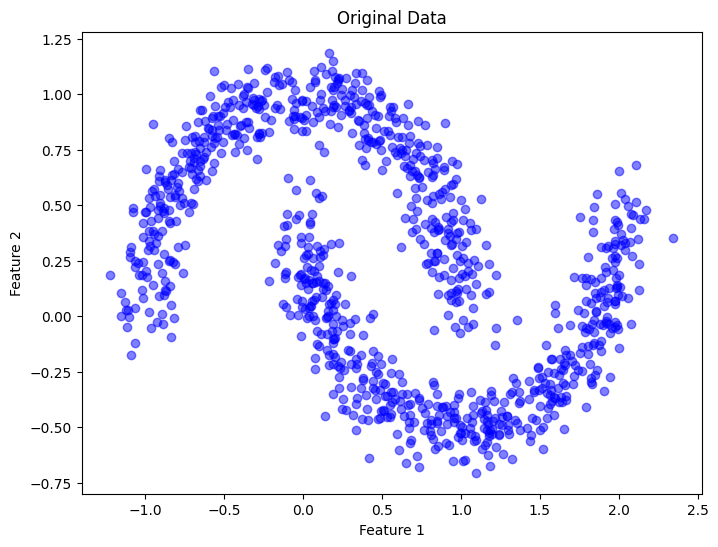

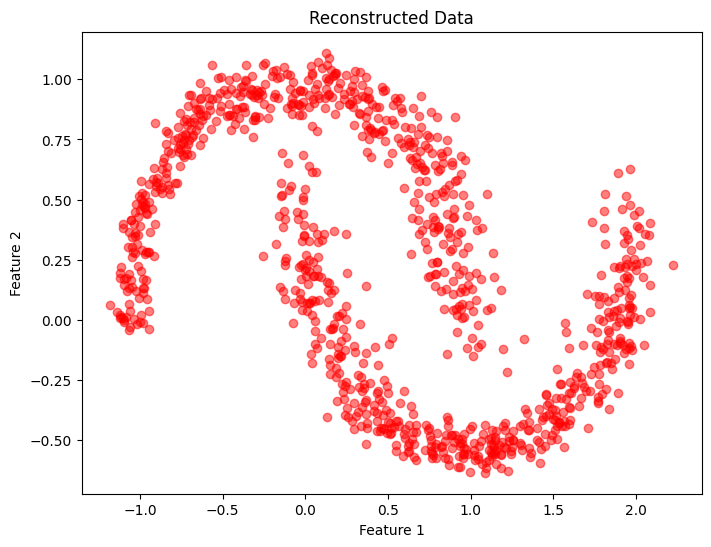

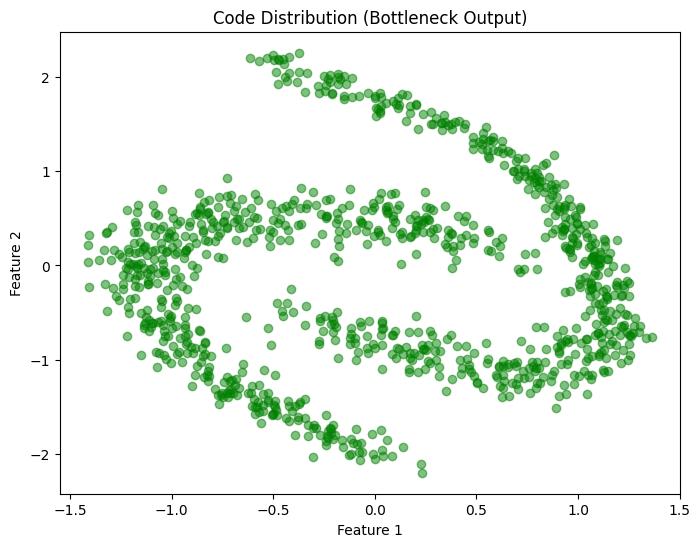

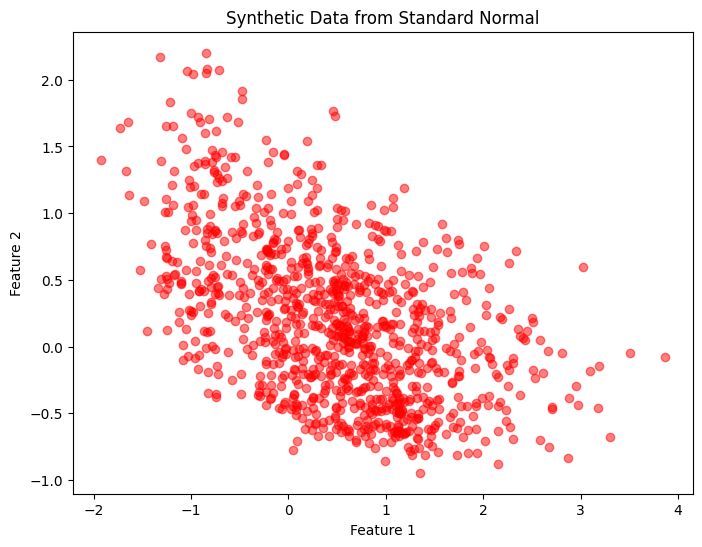

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

def build_layers(input_dim, output_dim, hidden_dim, layers, final_activation=None):
    layer_list = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
    for _ in range(layers - 1):
        layer_list += [nn.Linear(hidden_dim, hidden_dim), nn.ReLU()]
    layer_list.append(nn.Linear(hidden_dim, output_dim))
    if final_activation:
        layer_list.append(final_activation)
    return nn.Sequential(*layer_list)

def plot_scatter(data, title="", xlabel="Feature 1", ylabel="Feature 2", colors="blue"):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Autoencoder class with bottleneck size 2
class Autoencoder(nn.Module):
    def __init__(self, input_size, bottleneck_size, hidden_size, layers):
        super(Autoencoder, self).__init__()
        self.encoder = build_layers(input_size, bottleneck_size, hidden_size, layers)
        self.decoder = build_layers(bottleneck_size, input_size, hidden_size, layers)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded


def compute_mmd_loss(codes, n_samples=1000, bandwidths=None):
    if bandwidths is None:
        bandwidths = torch.tensor([0.1, 0.2, 0.4, 0.8, 1.6, 3.2], device=codes.device)
    x_sq = (codes ** 2).sum(dim=1, keepdim=True)
    x_dist = x_sq - 2.0 * torch.mm(codes, codes.t()) + x_sq.t()
    z = torch.randn(n_samples, codes.size(1), device=codes.device)
    z_sq = (z ** 2).sum(dim=1, keepdim=True)
    z_dist = z_sq - 2.0 * torch.mm(z, z.t()) + z_sq.t()
    cross_dist = x_sq - 2.0 * torch.mm(codes, z.t()) + z_sq.t()

    x_dist, z_dist, cross_dist = map(lambda x: torch.clamp(x, min=0.0), [x_dist, z_dist, cross_dist])

    kernels = torch.exp(-x_dist.unsqueeze(0) / (2.0 * bandwidths.view(-1, 1, 1) ** 2))
    k_xx = kernels.mean(dim=1)
    k_zz = torch.exp(-z_dist.unsqueeze(0) / (2.0 * bandwidths.view(-1, 1, 1) ** 2)).mean(dim=1)
    k_xz = torch.exp(-cross_dist.unsqueeze(0) / (2.0 * bandwidths.view(-1, 1, 1) ** 2)).mean(dim=1)

    return k_xx.mean() + k_zz.mean() - 2 * k_xz.mean()


def train_mmd_autoencoder(model, data_loader, num_epochs=10, learning_rate=0.001, mmd_weight=1.0):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        epoch_recon_loss = 0.0
        epoch_mmd_loss = 0.0
        for inputs, _ in data_loader:
            inputs = inputs.to(torch.float32)

            # Forward pass
            reconstructed, codes = model(inputs)
            recon_loss = criterion(reconstructed, inputs)
            mmd_loss = compute_mmd_loss(codes, n_samples=inputs.size(0))

            # Combined loss
            total_loss = recon_loss + mmd_weight * mmd_loss

            # Backward pass
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            epoch_recon_loss += recon_loss.item()
            epoch_mmd_loss += mmd_loss.item()

        print(f"Epoch [{epoch + 1}/{num_epochs}], Recon Loss: {epoch_recon_loss / len(data_loader):.4f}, "
              f"MMD Loss: {epoch_mmd_loss / len(data_loader):.4f}")


def generate_synthetic_data(autoencoder, n_samples=1000):
    z = torch.randn(n_samples, 2, device="cpu")
    with torch.no_grad():
        synthetic_data = autoencoder.decoder(z).numpy()
    plot_scatter(synthetic_data, title="Synthetic Data from Standard Normal", colors="red")
    return synthetic_data


def evaluate_reconstruction(autoencoder, data):
    with torch.no_grad():
        reconstructed, _ = autoencoder(data)
    plot_scatter(data.numpy(), title="Original Data", colors="blue")
    plot_scatter(reconstructed.numpy(), title="Reconstructed Data", colors="red")


def visualize_code_distribution(autoencoder, data):
    with torch.no_grad():
        _, codes = autoencoder(data)
    plot_scatter(codes.numpy(), title="Code Distribution (Bottleneck Output)", colors="green")


def create_moon_data(n_samples=1000, noise=0.1):
    X, _ = make_moons(n_samples=n_samples, noise=noise)
    return torch.tensor(X, dtype=torch.float32)


if __name__ == "__main__":

    input_size = 2
    bottleneck_size = 2
    hidden_size = 16
    layers = 3
    num_epochs = 20
    batch_size = 32
    learning_rate = 0.001
    mmd_weight = 10.0
    noise_level = 0.1


    train_data = create_moon_data(n_samples=1000, noise=noise_level)
    dataset = TensorDataset(train_data, train_data)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


    autoencoder = Autoencoder(input_size, bottleneck_size, hidden_size, layers)
    train_mmd_autoencoder(autoencoder, data_loader, num_epochs, learning_rate, mmd_weight)


    evaluate_reconstruction(autoencoder, train_data)
    visualize_code_distribution(autoencoder, train_data)
    generate_synthetic_data(autoencoder, n_samples=1000)


The reconstructed data closely matches the original, showing that the autoencoder with a bottleneck of size 2 effectively captures the underlying structure of the dataset, with significantly lower reconstruction loss compared to a bottleneck of size 1. The code distribution is well-organized, indicating that the model has learned a meaningful lower-dimensional representation. The synthetic data generated from standard normal samples through the decoder retains the overall shape and structure of the original data, demonstrating that the model has effectively learned the data distribution, though minor variations in density are observed.

Q3.1


Training Autoencoder with Bottleneck Size 2
Epoch [1/20], Loss: 0.1327
Epoch [2/20], Loss: 0.0752
Epoch [3/20], Loss: 0.0727
Epoch [4/20], Loss: 0.0683
Epoch [5/20], Loss: 0.0629
Epoch [6/20], Loss: 0.0587
Epoch [7/20], Loss: 0.0551
Epoch [8/20], Loss: 0.0532
Epoch [9/20], Loss: 0.0518
Epoch [10/20], Loss: 0.0503
Epoch [11/20], Loss: 0.0486
Epoch [12/20], Loss: 0.0470
Epoch [13/20], Loss: 0.0458
Epoch [14/20], Loss: 0.0451
Epoch [15/20], Loss: 0.0440
Epoch [16/20], Loss: 0.0431
Epoch [17/20], Loss: 0.0423
Epoch [18/20], Loss: 0.0415
Epoch [19/20], Loss: 0.0408
Epoch [20/20], Loss: 0.0402


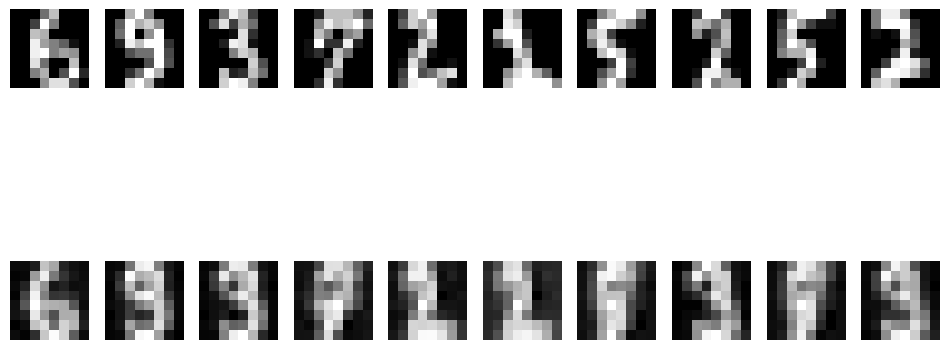

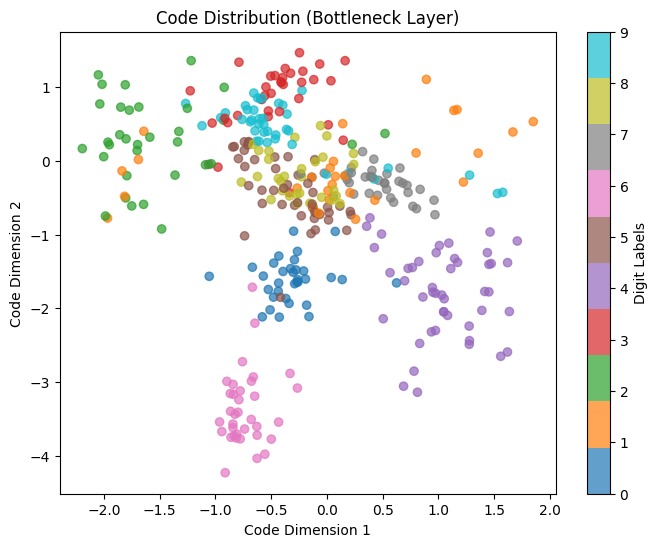

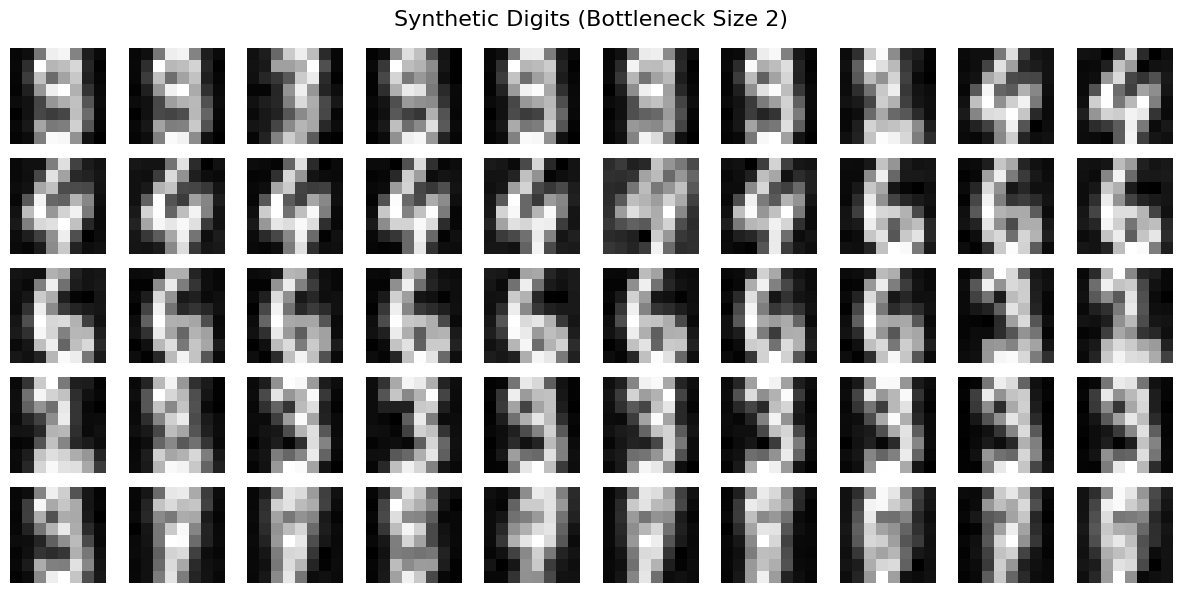

Accuracy on Original Test Data: 0.9722
Accuracy on Reconstructed Test Data: 0.6694

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Classification Report for Reconstructed Data:
               precision    recall  f1-score   support

           0

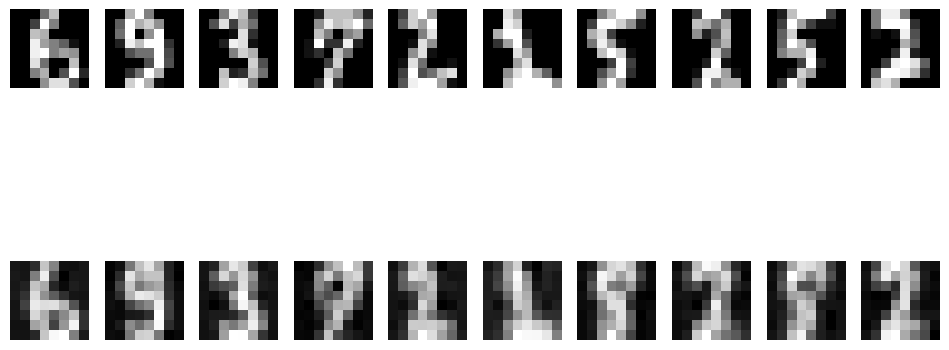

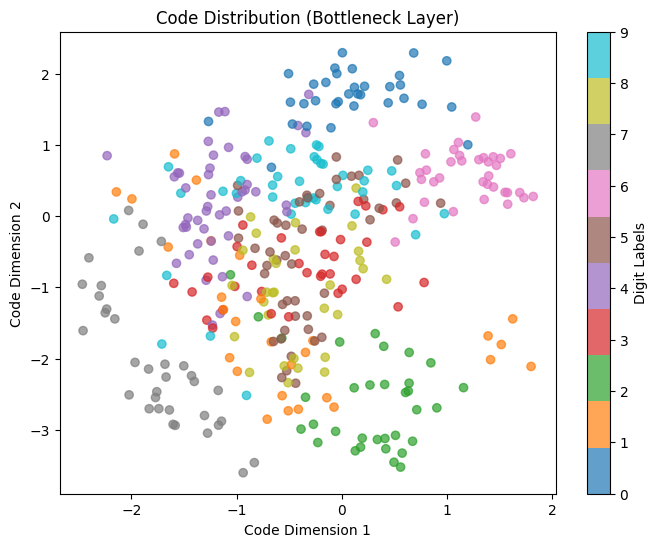

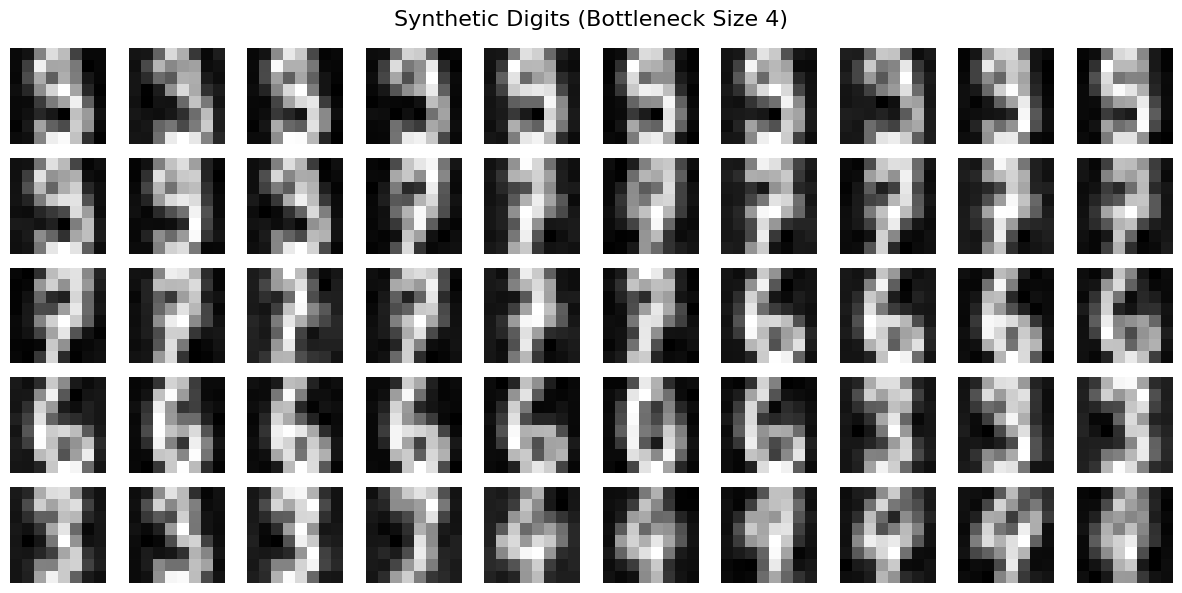

Accuracy on Original Test Data: 0.9722
Accuracy on Reconstructed Test Data: 0.7778

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Classification Report for Reconstructed Data:
               precision    recall  f1-score   support

           0

C:\Users\Sid\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sid\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sid\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [1/20], Loss: 0.1513
Epoch [2/20], Loss: 0.0758
Epoch [3/20], Loss: 0.0732
Epoch [4/20], Loss: 0.0706
Epoch [5/20], Loss: 0.0633
Epoch [6/20], Loss: 0.0508
Epoch [7/20], Loss: 0.0419
Epoch [8/20], Loss: 0.0369
Epoch [9/20], Loss: 0.0319
Epoch [10/20], Loss: 0.0292
Epoch [11/20], Loss: 0.0272
Epoch [12/20], Loss: 0.0259
Epoch [13/20], Loss: 0.0248
Epoch [14/20], Loss: 0.0237
Epoch [15/20], Loss: 0.0228
Epoch [16/20], Loss: 0.0222
Epoch [17/20], Loss: 0.0214
Epoch [18/20], Loss: 0.0207
Epoch [19/20], Loss: 0.0201
Epoch [20/20], Loss: 0.0195


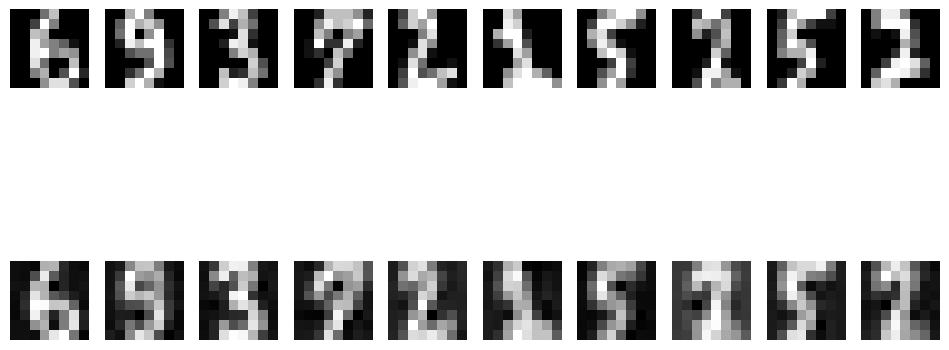

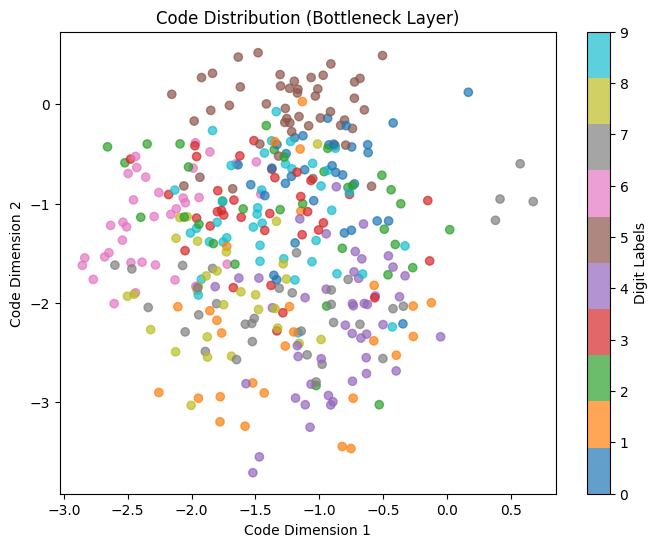

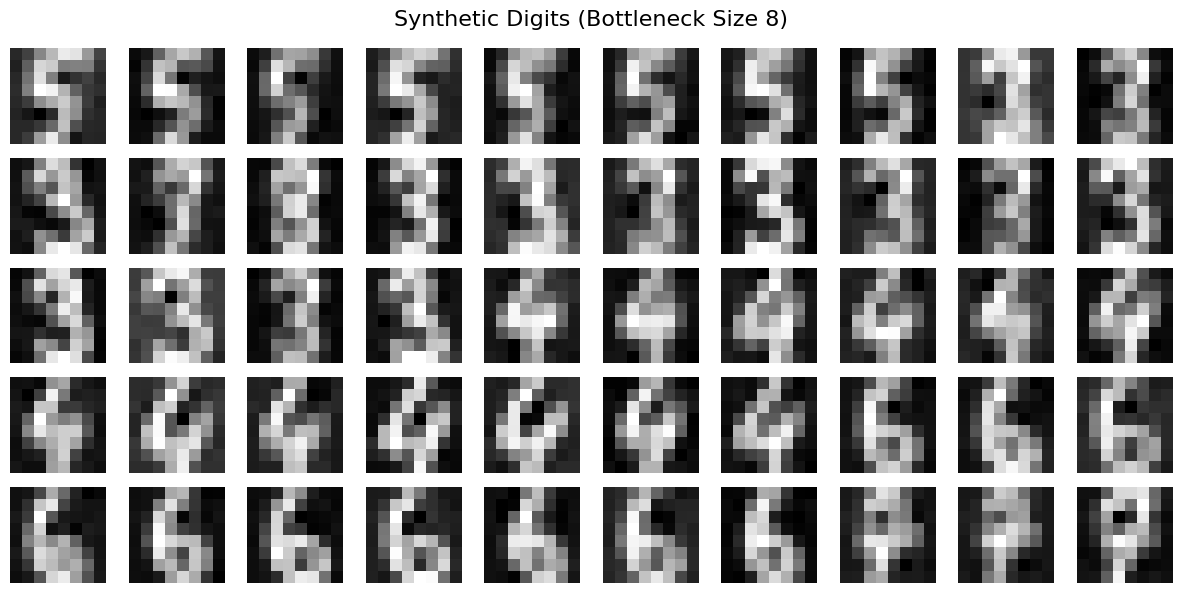

Accuracy on Original Test Data: 0.9722
Accuracy on Reconstructed Test Data: 0.9194

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Classification Report for Reconstructed Data:
               precision    recall  f1-score   support

           0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


def plot_reconstructions(original, reconstructed, n_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(n_images):
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original[i].reshape(8, 8), cmap="gray")
        plt.axis("off")
        if i == 0:
            plt.ylabel("Original", fontsize=12)

        plt.subplot(2, n_images, i + 1 + n_images)
        plt.imshow(reconstructed[i].reshape(8, 8), cmap="gray")
        plt.axis("off")
        if i == 0:
            plt.ylabel("Reconstructed", fontsize=12)
    plt.show()

def visualize_code_distribution(codes, labels):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(codes[:, 0], codes[:, 1], c=labels, cmap="tab10", alpha=0.7)
    plt.colorbar(scatter, label="Digit Labels")
    plt.title("Code Distribution (Bottleneck Layer)")
    plt.xlabel("Code Dimension 1")
    plt.ylabel("Code Dimension 2")
    plt.show()

def visualize_synthetic_digits(synthetic_digits, title="Synthetic Digits", n_rows=5, n_cols=10):
    plt.figure(figsize=(12, 6))
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(synthetic_digits[i].reshape(8, 8), cmap="gray")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


class Autoencoder(nn.Module):
    def __init__(self, input_size, bottleneck_size, hidden_size, layers):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            *(nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.ReLU()) for _ in range(layers - 1)),
            nn.Linear(hidden_size, bottleneck_size)
        )
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
            *(nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.ReLU()) for _ in range(layers - 1)),
            nn.Linear(hidden_size, input_size)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded


def train_autoencoder(model, data_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for inputs, _ in data_loader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss / len(data_loader):.4f}")
    return model


def fit_gmm_and_generate_synthetic_digits(autoencoder, data, labels, bottleneck_size, n_components=10, n_samples=100):
    with torch.no_grad():
        _, codes = autoencoder(data)
        codes = codes.numpy()

    visualize_code_distribution(codes, labels)

    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(codes)

    sampled_codes, _ = gmm.sample(n_samples=n_samples)
    sampled_codes = torch.tensor(sampled_codes, dtype=torch.float32)

    with torch.no_grad():
        synthetic_digits = autoencoder.decoder(sampled_codes).numpy()

    visualize_synthetic_digits(synthetic_digits, title=f"Synthetic Digits (Bottleneck Size {bottleneck_size})")
    return synthetic_digits


def classify_and_compare(train_data, train_labels, test_data, test_labels, reconstructed_data):
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(train_data.numpy(), train_labels.numpy())

    original_predictions = classifier.predict(test_data.numpy())
    reconstructed_predictions = classifier.predict(reconstructed_data)

    original_accuracy = accuracy_score(test_labels.numpy(), original_predictions)
    reconstructed_accuracy = accuracy_score(test_labels.numpy(), reconstructed_predictions)

    print(f"Accuracy on Original Test Data: {original_accuracy:.4f}")
    print(f"Accuracy on Reconstructed Test Data: {reconstructed_accuracy:.4f}")
    print("\nClassification Report for Original Data:\n", classification_report(test_labels.numpy(), original_predictions))
    print("\nClassification Report for Reconstructed Data:\n", classification_report(test_labels.numpy(), reconstructed_predictions))


if __name__ == "__main__":
    # Load and preprocess digits dataset
    digits = load_digits()
    data = MinMaxScaler().fit_transform(digits.data)
    labels = digits.target
    data = torch.tensor(data, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)

    train_data, test_data, train_labels, test_labels = train_test_split(
        data, labels, test_size=0.2, random_state=42
    )

    train_loader = DataLoader(TensorDataset(train_data, train_data), batch_size=64, shuffle=True)


    input_size = 64
    hidden_size = 128
    layers = 2
    num_epochs = 20
    learning_rate = 0.001
    bottleneck_sizes = [2, 4, 8]

    for bottleneck_size in bottleneck_sizes:
        print(f"\nTraining Autoencoder with Bottleneck Size {bottleneck_size}")
        autoencoder = Autoencoder(input_size, bottleneck_size, hidden_size, layers)
        autoencoder = train_autoencoder(autoencoder, train_loader, num_epochs, learning_rate)

        # Evaluate reconstruction
        reconstructed_test_data = []
        with torch.no_grad():
            for inputs, _ in DataLoader(TensorDataset(test_data, test_data), batch_size=64):
                outputs, _ = autoencoder(inputs)
                reconstructed_test_data.append(outputs.numpy())
        reconstructed_test_data = np.vstack(reconstructed_test_data)

        plot_reconstructions(test_data.numpy(), reconstructed_test_data)


        synthetic_digits = fit_gmm_and_generate_synthetic_digits(
            autoencoder, test_data, test_labels, bottleneck_size
        )


        classify_and_compare(train_data, train_labels, test_data, test_labels, reconstructed_test_data)


Better reconstruction quality occurs with bigger bottleneck sizes, where size 2 results in minor blurring and size 8 preserves most details. As the bottleneck size increases, the accuracy of classification on reconstructed data also improves, suggesting improved retention of features. Bigger bottlenecks result in synthetic digits that closely resemble real ones, emphasizing the benefit of having more expressive latent spaces. In general, a bottleneck size of 4 offers a satisfactory blend of quality and complexity.